In [ ]:
import math

import blur_detector
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy.orm import Session
from src.api.db import engine
from src.api.services import simrooms_service, labeling_service

from controlled_experiment.settings import (
    CLASS_ID_TO_NAME,
    LABELING_REC_SAME_BACKGROUND_ID,
)

## Laplacian variance:

Laplacian Variance measures image detail by evaluating the variance in pixel intensities, with a higher value indicating greater image sharpness 

## Spatially Varying Blur Detection

See https://github.com/Utkarsh-Deshmukh/Spatially-Varying-Blur-Detection-python and the paper https://arxiv.org/pdf/1703.07478

Generates a blur map, with higher intensities being sharper and lower intensities being blurry

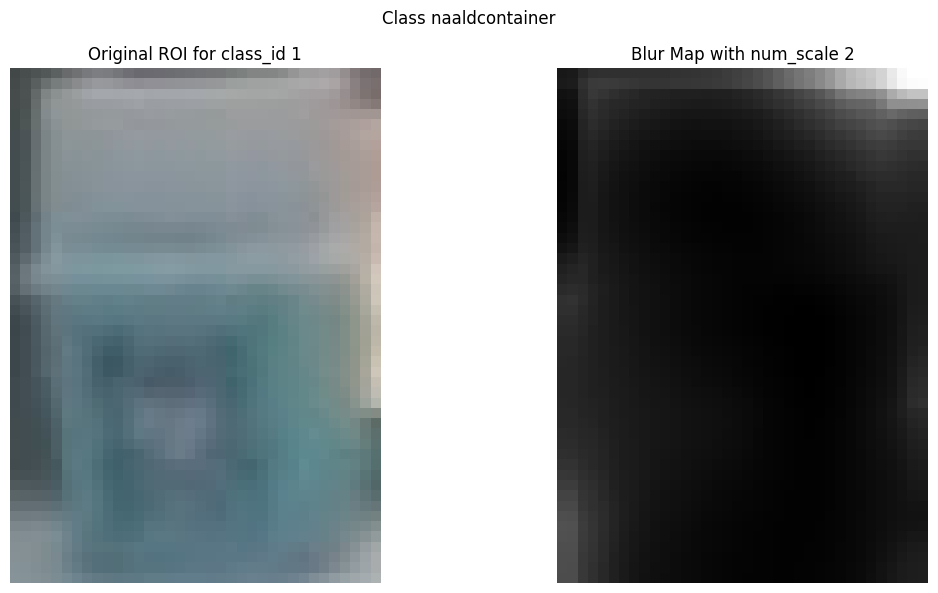

class_id: 1
mask_area: 1652
laplacian_variance: 158.92485510973935
blur_var: 0.00822257915377783
num_scale: 2
raw_percentile90: 0.37740192878885015
winsorized_90: 0.37740192878885015
trimmed_mean: 0.28611783579263655
median: 0.2786140357125868
mad: 0.033616096941793


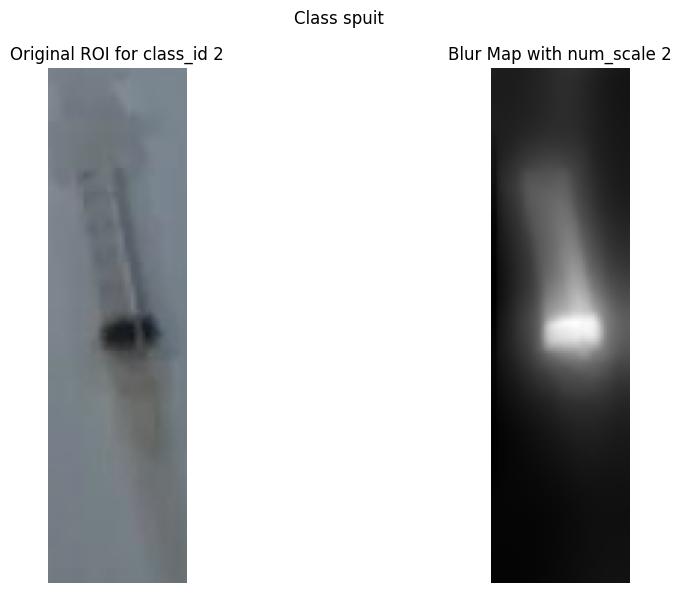

class_id: 2
mask_area: 3770
laplacian_variance: 16.418825398878433
blur_var: 0.030460586345859773
num_scale: 2
raw_percentile90: 0.45235187265530585
winsorized_90: 0.45235187265530585
trimmed_mean: 0.19478484480901376
median: 0.16965708080578876
mad: 0.07526040452259865


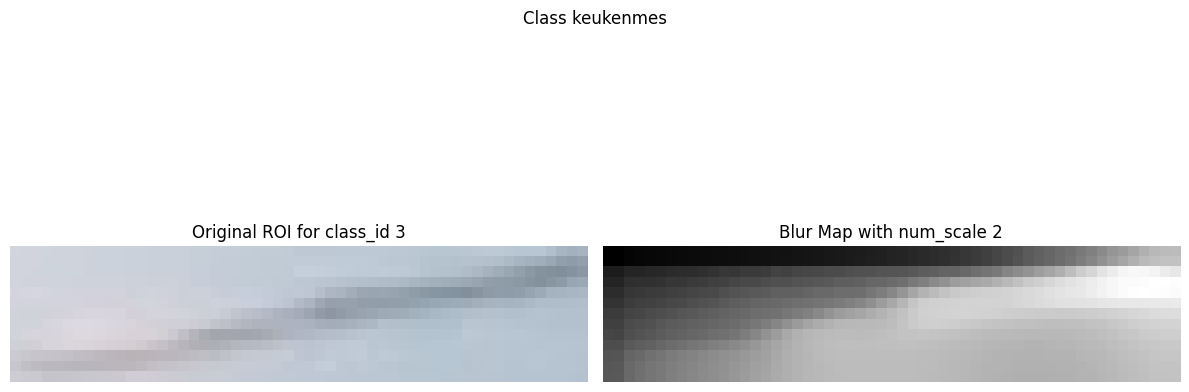

class_id: 3
mask_area: 354
laplacian_variance: 173.27569400296673
blur_var: 0.05585774731397358
num_scale: 2
raw_percentile90: 0.8360304165895258
winsorized_90: 0.8360304165895258
trimmed_mean: 0.5983395669191309
median: 0.6732104191775226
mad: 0.1578479064294085


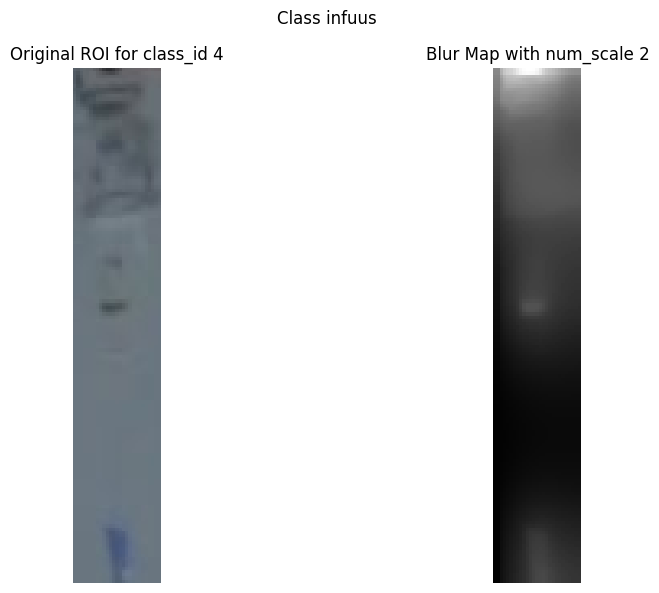

class_id: 4
mask_area: 1640
laplacian_variance: 25.9383496871984
blur_var: 0.025584982687103377
num_scale: 2
raw_percentile90: 0.3785006267817621
winsorized_90: 0.3785006267817621
trimmed_mean: 0.18485232063285942
median: 0.1835231711065487
mad: 0.11871535279253559


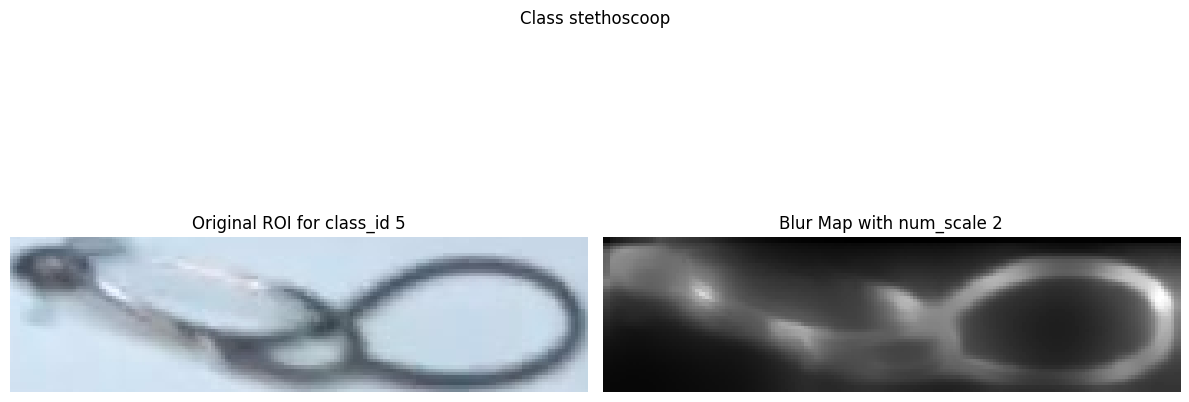

class_id: 5
mask_area: 5358
laplacian_variance: 183.3634980640936
blur_var: 0.028481088768171823
num_scale: 2
raw_percentile90: 0.5066105113186301
winsorized_90: 0.5066105113186301
trimmed_mean: 0.2523703501552902
median: 0.23937910732930393
mad: 0.10774268865358508


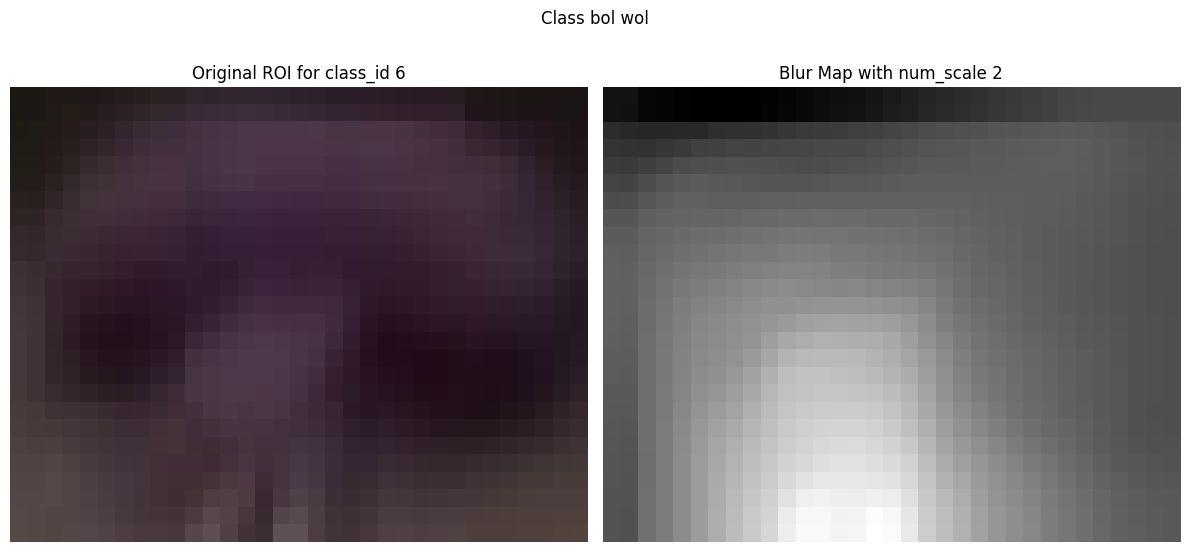

class_id: 6
mask_area: 695
laplacian_variance: 55.37887753272368
blur_var: 0.014691323930486876
num_scale: 2
raw_percentile90: 0.8436323370350447
winsorized_90: 0.8436323370350447
trimmed_mean: 0.6520512321586146
median: 0.62778566584159
mad: 0.05432128164813066


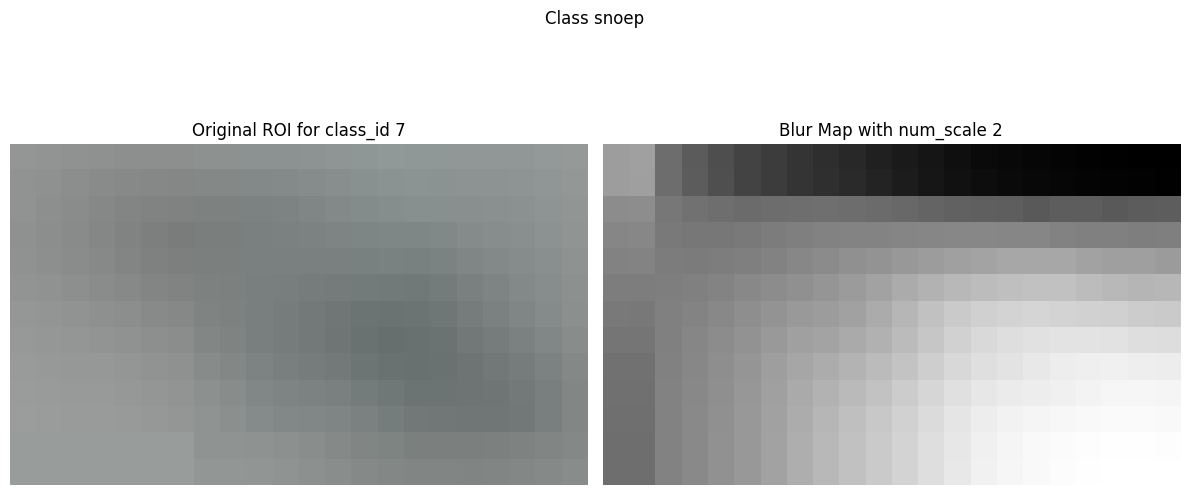

class_id: 7
mask_area: 218
laplacian_variance: 31.77179677354502
blur_var: 0.023051076426187738
num_scale: 2
raw_percentile90: 0.9617015325764311
winsorized_90: 0.9617015325764311
trimmed_mean: 0.7674802547923251
median: 0.7553694107120312
mad: 0.09331526932397072


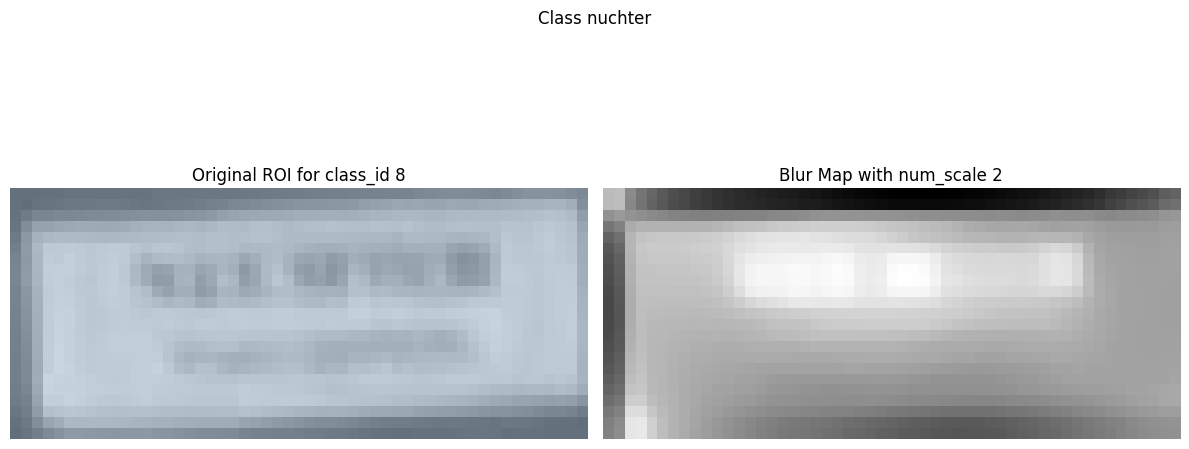

class_id: 8
mask_area: 1139
laplacian_variance: 389.0614114367739
blur_var: 0.022436235041920296
num_scale: 2
raw_percentile90: 0.9150918537173669
winsorized_90: 0.9150918537173669
trimmed_mean: 0.7508916557288751
median: 0.7484561969738821
mad: 0.0759609315674008


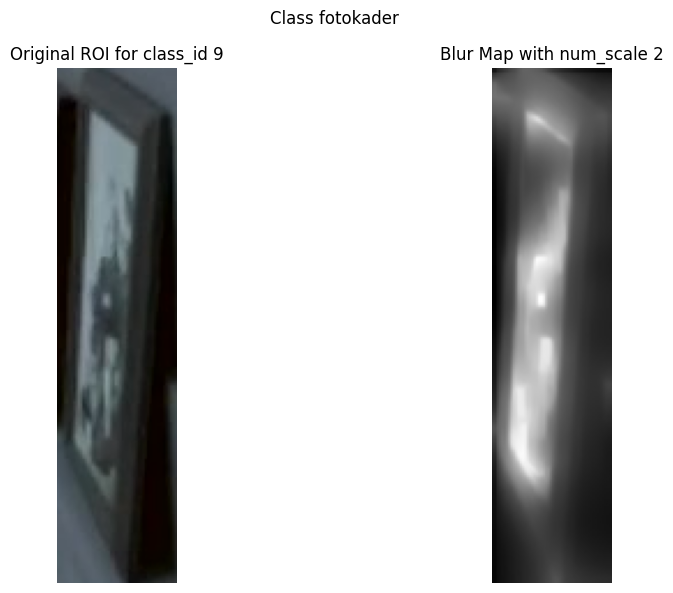

class_id: 9
mask_area: 9775
laplacian_variance: 116.13228101694135
blur_var: 0.04766466459275212
num_scale: 2
raw_percentile90: 0.7297161571427465
winsorized_90: 0.7297161571427465
trimmed_mean: 0.341648692658237
median: 0.30106781227356105
mad: 0.1215920432677324


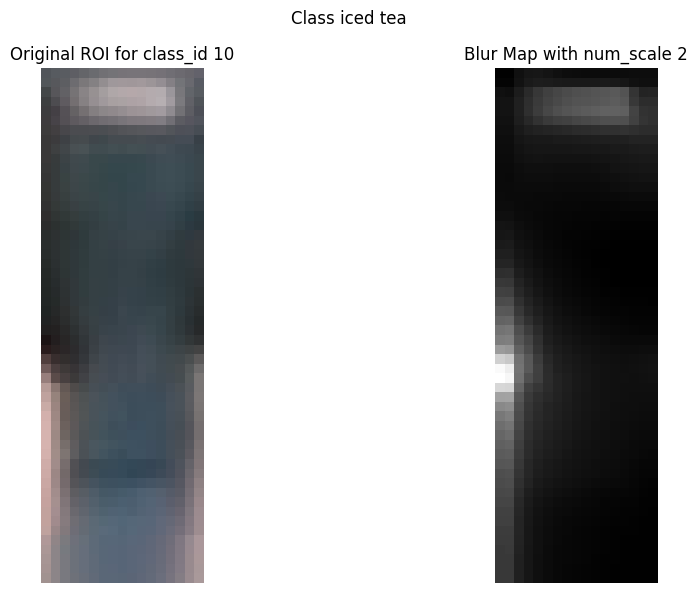

class_id: 10
mask_area: 827
laplacian_variance: 332.69949420635413
blur_var: 0.010627499793898747
num_scale: 2
raw_percentile90: 0.4123657175173994
winsorized_90: 0.4123657175173994
trimmed_mean: 0.2654239507034413
median: 0.25089103969912335
mad: 0.03126855549173714


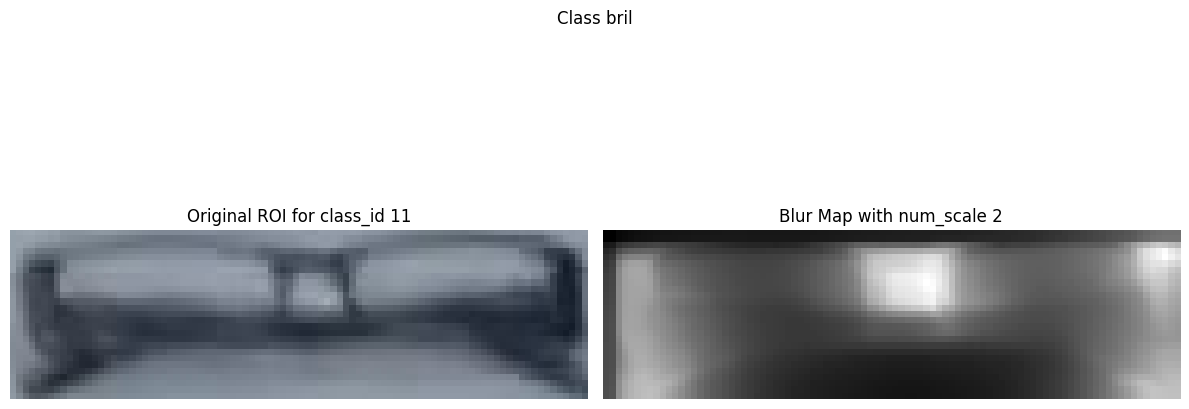

class_id: 11
mask_area: 1971
laplacian_variance: 377.72046690157146
blur_var: 0.03811961301442224
num_scale: 2
raw_percentile90: 0.692522178277258
winsorized_90: 0.692522178277258
trimmed_mean: 0.4013761685616751
median: 0.38445595373673885
mad: 0.12570331339354995


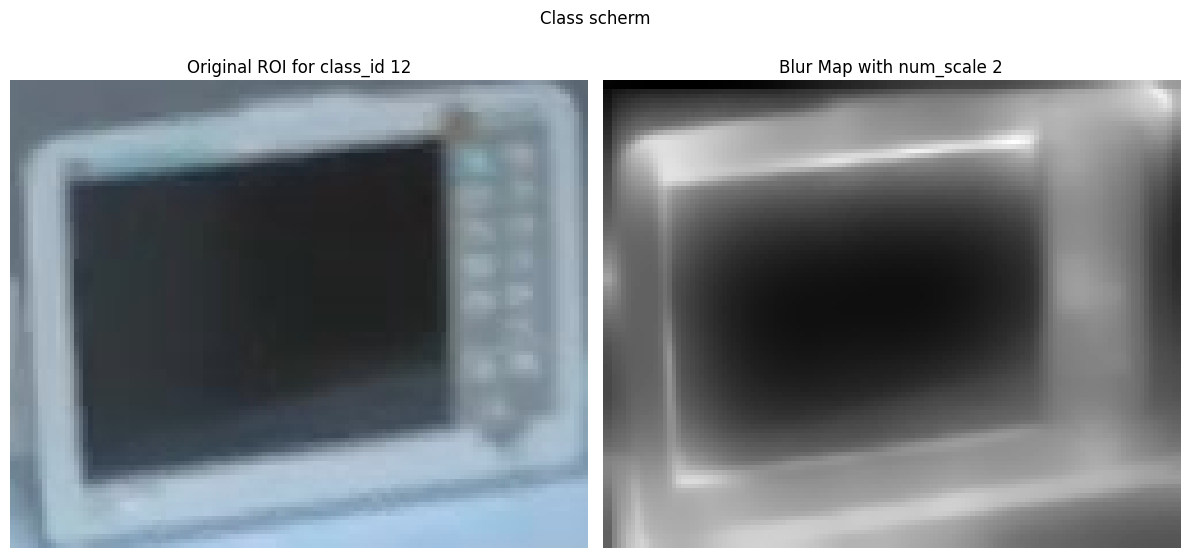

class_id: 12
mask_area: 11079
laplacian_variance: 77.84987556441658
blur_var: 0.04216531739091335
num_scale: 2
raw_percentile90: 0.7125033302301486
winsorized_90: 0.7125033302301486
trimmed_mean: 0.44577969007192136
median: 0.4525309421851139
mad: 0.1654410852921709


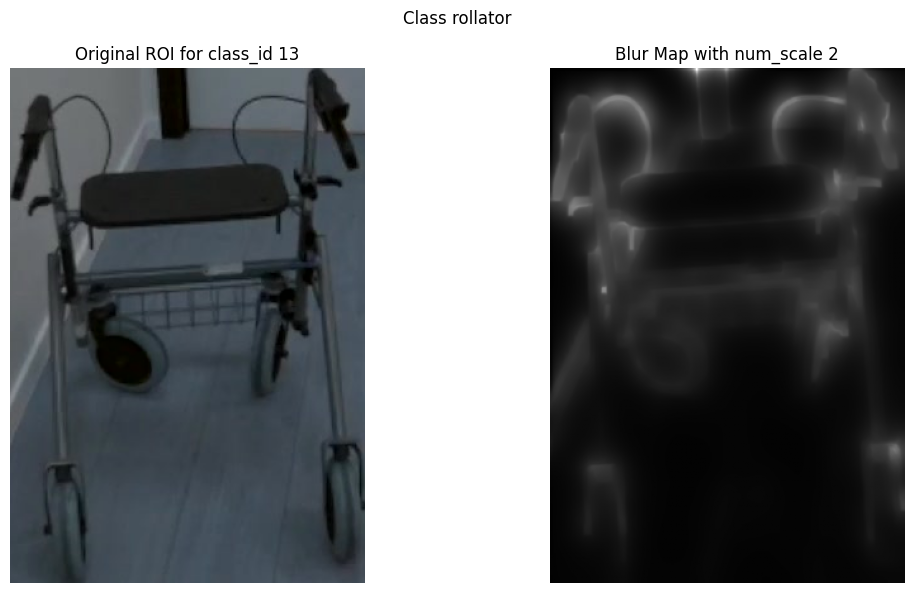

class_id: 13
mask_area: 40847
laplacian_variance: 45.977740162375355
blur_var: 0.007674038541009888
num_scale: 2
raw_percentile90: 0.22961505547133937
winsorized_90: 0.22961505547133937
trimmed_mean: 0.08815862695160781
median: 0.07351264161460722
mad: 0.049603657829481965


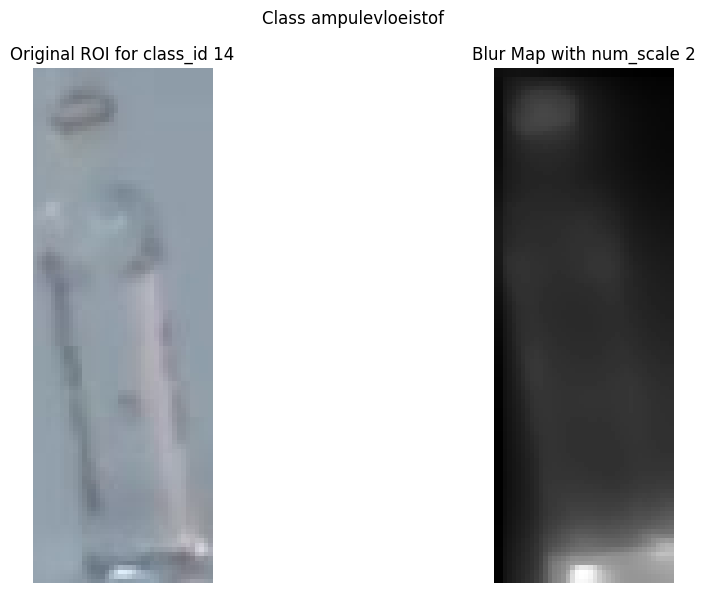

class_id: 14
mask_area: 2938
laplacian_variance: 64.02996059651333
blur_var: 0.015968912090702912
num_scale: 2
raw_percentile90: 0.2858312497546617
winsorized_90: 0.2858312497546617
trimmed_mean: 0.17687626713400395
median: 0.18875670472743267
mad: 0.036875821963818764


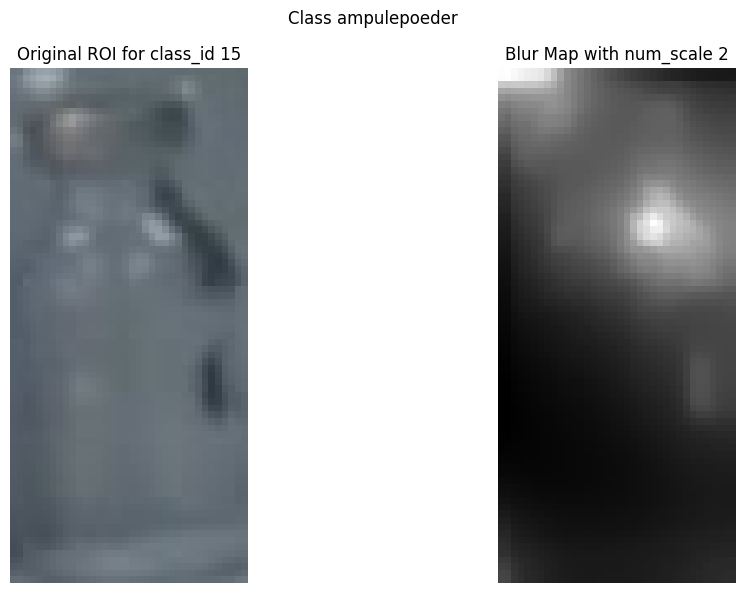

class_id: 15
mask_area: 2370
laplacian_variance: 51.7899076706403
blur_var: 0.02919718434700233
num_scale: 2
raw_percentile90: 0.5442129505366472
winsorized_90: 0.5442129505366472
trimmed_mean: 0.29038485588260315
median: 0.2613930592457049
mad: 0.11032145013785212


In [ ]:
import warnings
from concurrent.futures import ProcessPoolExecutor

from scipy.stats import trim_mean

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)


def compute_robust_metrics(blur_map):
    # Flatten the blur_map to a 1D array of high frequency coefficients.
    h_freq_values = blur_map.flatten()

    # Raw 90th percentile of the raw data.
    raw_percentile90 = np.percentile(h_freq_values, 90)

    # Winsorize the data by clipping the lower 5% and upper 95% of the values.
    lower_bound = np.percentile(h_freq_values, 5)
    upper_bound = np.percentile(h_freq_values, 95)
    winsorized = np.clip(h_freq_values, lower_bound, upper_bound)
    winsorized_90 = np.percentile(winsorized, 90)

    # Calculate a 10% trimmed mean (dropping 10% of the extreme values on each tail).
    trimmed = trim_mean(h_freq_values, proportiontocut=0.1)

    # Compute the median.
    median_val = np.median(h_freq_values)

    # Compute the median absolute deviation (MAD).
    mad_val = np.median(np.abs(h_freq_values - median_val))

    return {
        "raw_percentile90": raw_percentile90,
        "winsorized_90": winsorized_90,
        "trimmed_mean": trimmed,
        "median": median_val,
        "mad": mad_val,
    }


# Define a function to process a single annotation file.
def process_annotation(annotation_path):
    try:
        annotation_file = np.load(annotation_path)
    except Exception as e:
        # Handle file loading issues
        print(f"Failed to load {annotation_path}: {e}")
        return []

    # Extract metadata and ROI from the annotation file.
    class_id = int(annotation_file["class_id"])
    mask_area = np.sum(annotation_file["mask"])
    roi = annotation_file["roi"]
    laplacian_variance = cv2.Laplacian(roi, cv2.CV_64F).var()
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    results = []
    # Loop over the different number of scales.
    for num_scale in [2]:
        # Compute the blur map.
        blur_map = blur_detector.detectBlur(
            roi_gray,
            downsampling_factor=1,
            num_scales=num_scale,
            scale_start=1,
            show_progress=False,
        )

        # Create a figure with two subplots: original ROI and blur map
        plt.figure(figsize=(12, 6))

        # Show original ROI on the left
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Original ROI for class_id {class_id}")

        # Show blur map on the right
        plt.subplot(1, 2, 2)
        plt.imshow(blur_map, cmap="gray")
        plt.axis("off")
        plt.title(f"Blur Map with num_scale {num_scale}")

        plt.suptitle(f"Class {CLASS_ID_TO_NAME.get(class_id, f'ID {class_id}')}")
        plt.tight_layout()
        plt.show()

        # Store the results
        blur_map = blur_detector.detectBlur(
            roi_gray,
            downsampling_factor=1,
            num_scales=num_scale,
            scale_start=1,
            show_progress=False,
        )

        # Basic variance metric.
        blur_var = blur_map.var()
        # Compute robust metrics from the blur_map.
        robust_metrics = compute_robust_metrics(blur_map)

        # Build the result dictionary with all the metrics.
        results.append({
            "class_id": class_id,
            "mask_area": mask_area,
            "laplacian_variance": laplacian_variance,
            "blur_var": blur_var,
            "num_scale": num_scale,
            # Add robust metrics.
            "raw_percentile90": robust_metrics["raw_percentile90"],
            "winsorized_90": robust_metrics["winsorized_90"],
            "trimmed_mean": robust_metrics["trimmed_mean"],
            "median": robust_metrics["median"],
            "mad": robust_metrics["mad"],
        })

        for metric_name, metric_value in results[-1].items():
            print(f"{metric_name}: {metric_value}")

    return results


# Prepare an empty list for the results.
result_rows = []


with Session(engine) as session:
    annotated_classes = simrooms_service.get_tracked_classes(
        db=session,
        simroom_id=1,
        recording_id=LABELING_REC_SAME_BACKGROUND_ID,
    )


# For every annotated class in the recording:
for anno_class in annotated_classes:
    annotation_paths = labeling_service.get_class_tracking_results(anno_class.id)

    annotation_paths = [annotation_paths[100]]

    # Use ProcessPoolExecutor to process annotations concurrently.
    with ProcessPoolExecutor() as executor:
        process_annotation(annotation_paths[0])

        # Submit each annotation file to the executor.
        # future_to_path = {executor.submit(process_annotation, path): path for path in annotation_paths}

        # # As each future completes, gather its results.
        # for future in tqdm(as_completed(future_to_path), total=len(future_to_path),
        #                     desc=f"Processing annotations for class_id {anno_class.id}"):
        #     try:
        #         annotation_results = future.result()
        #         result_rows.extend(annotation_results)
        #     except Exception as exc:
        #         failed_path = future_to_path[future]
        #         print(f"Error processing {failed_path}: {exc}")

# Create a DataFrame with the collected results.
result_df = pd.DataFrame(result_rows)
result_df.to_csv("data/blur_analysis_results.csv", index=False)

In [13]:
BLUR_DATASET_PATH = "data/blur_analysis_results.csv"
blur_df = pd.read_csv(BLUR_DATASET_PATH)

blur_df.head()

,class_id,mask_area,laplacian_variance,blur_var,num_scale
0,1,1193,135.916655,0.008932,2
1,1,1193,135.916655,0.006847,3
2,1,1193,135.916655,0.017050,4
3,1,1166,190.566648,0.014315,2
4,1,1166,190.566648,0.013135,3


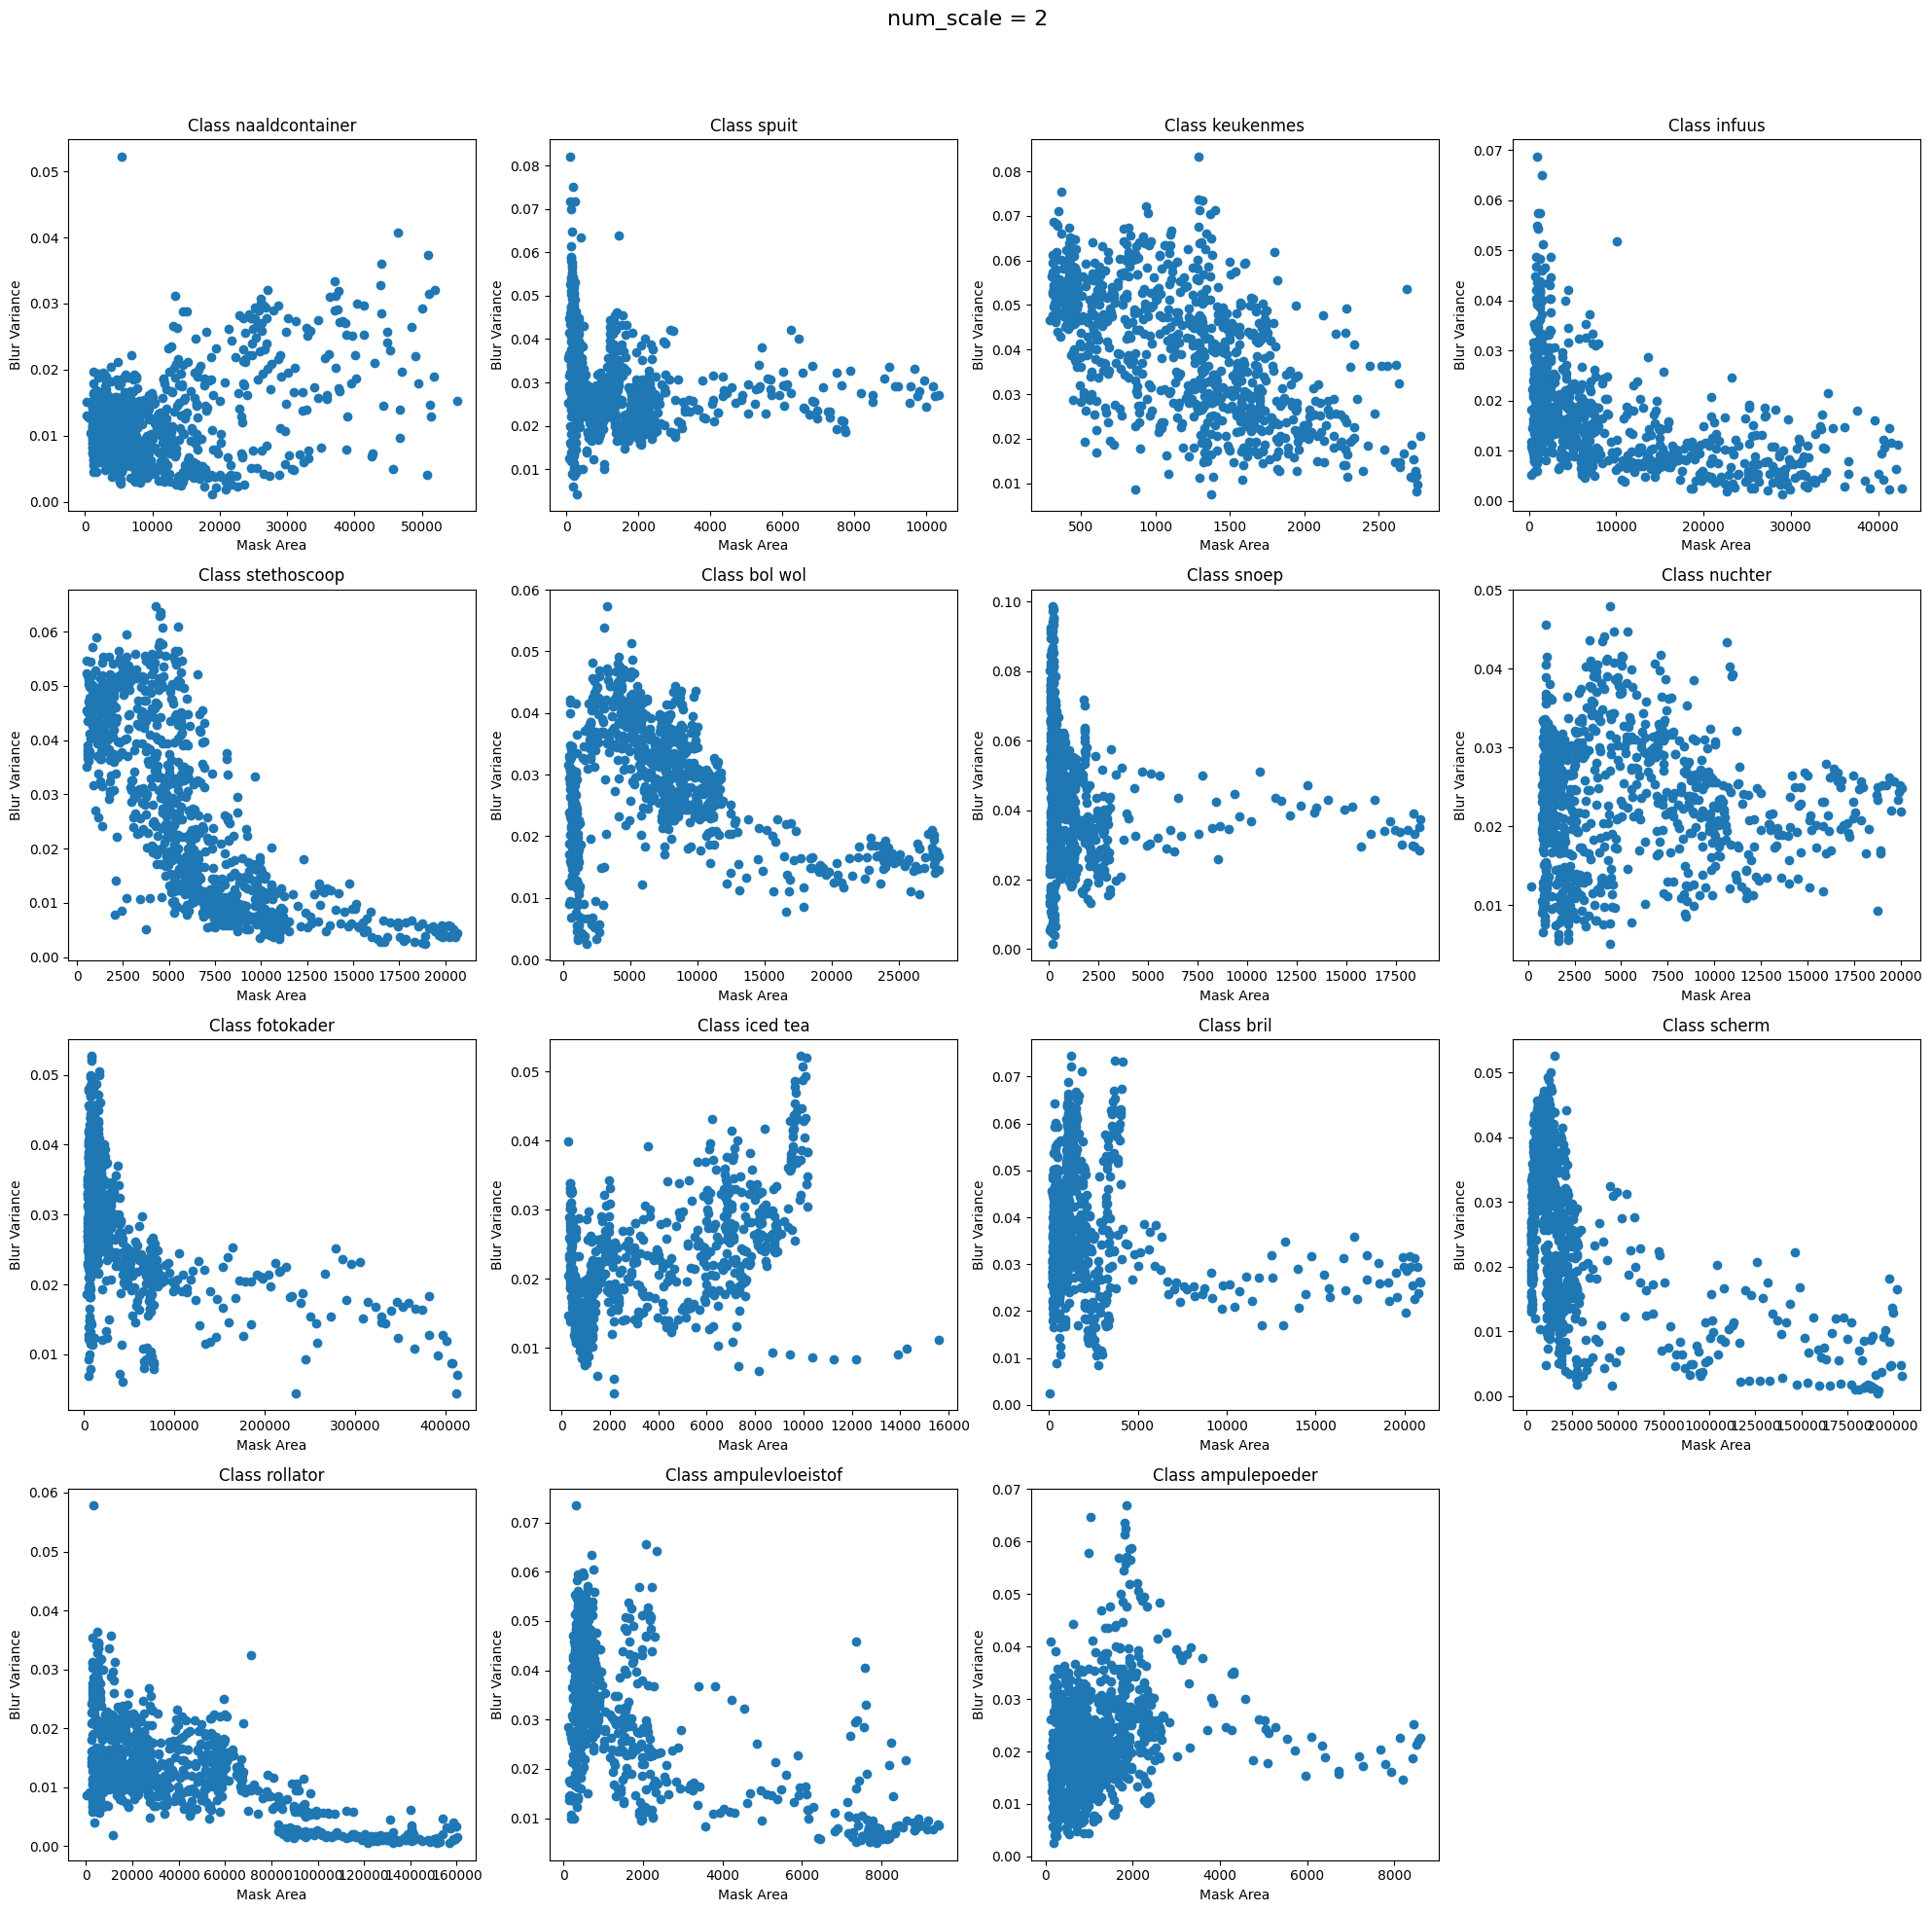

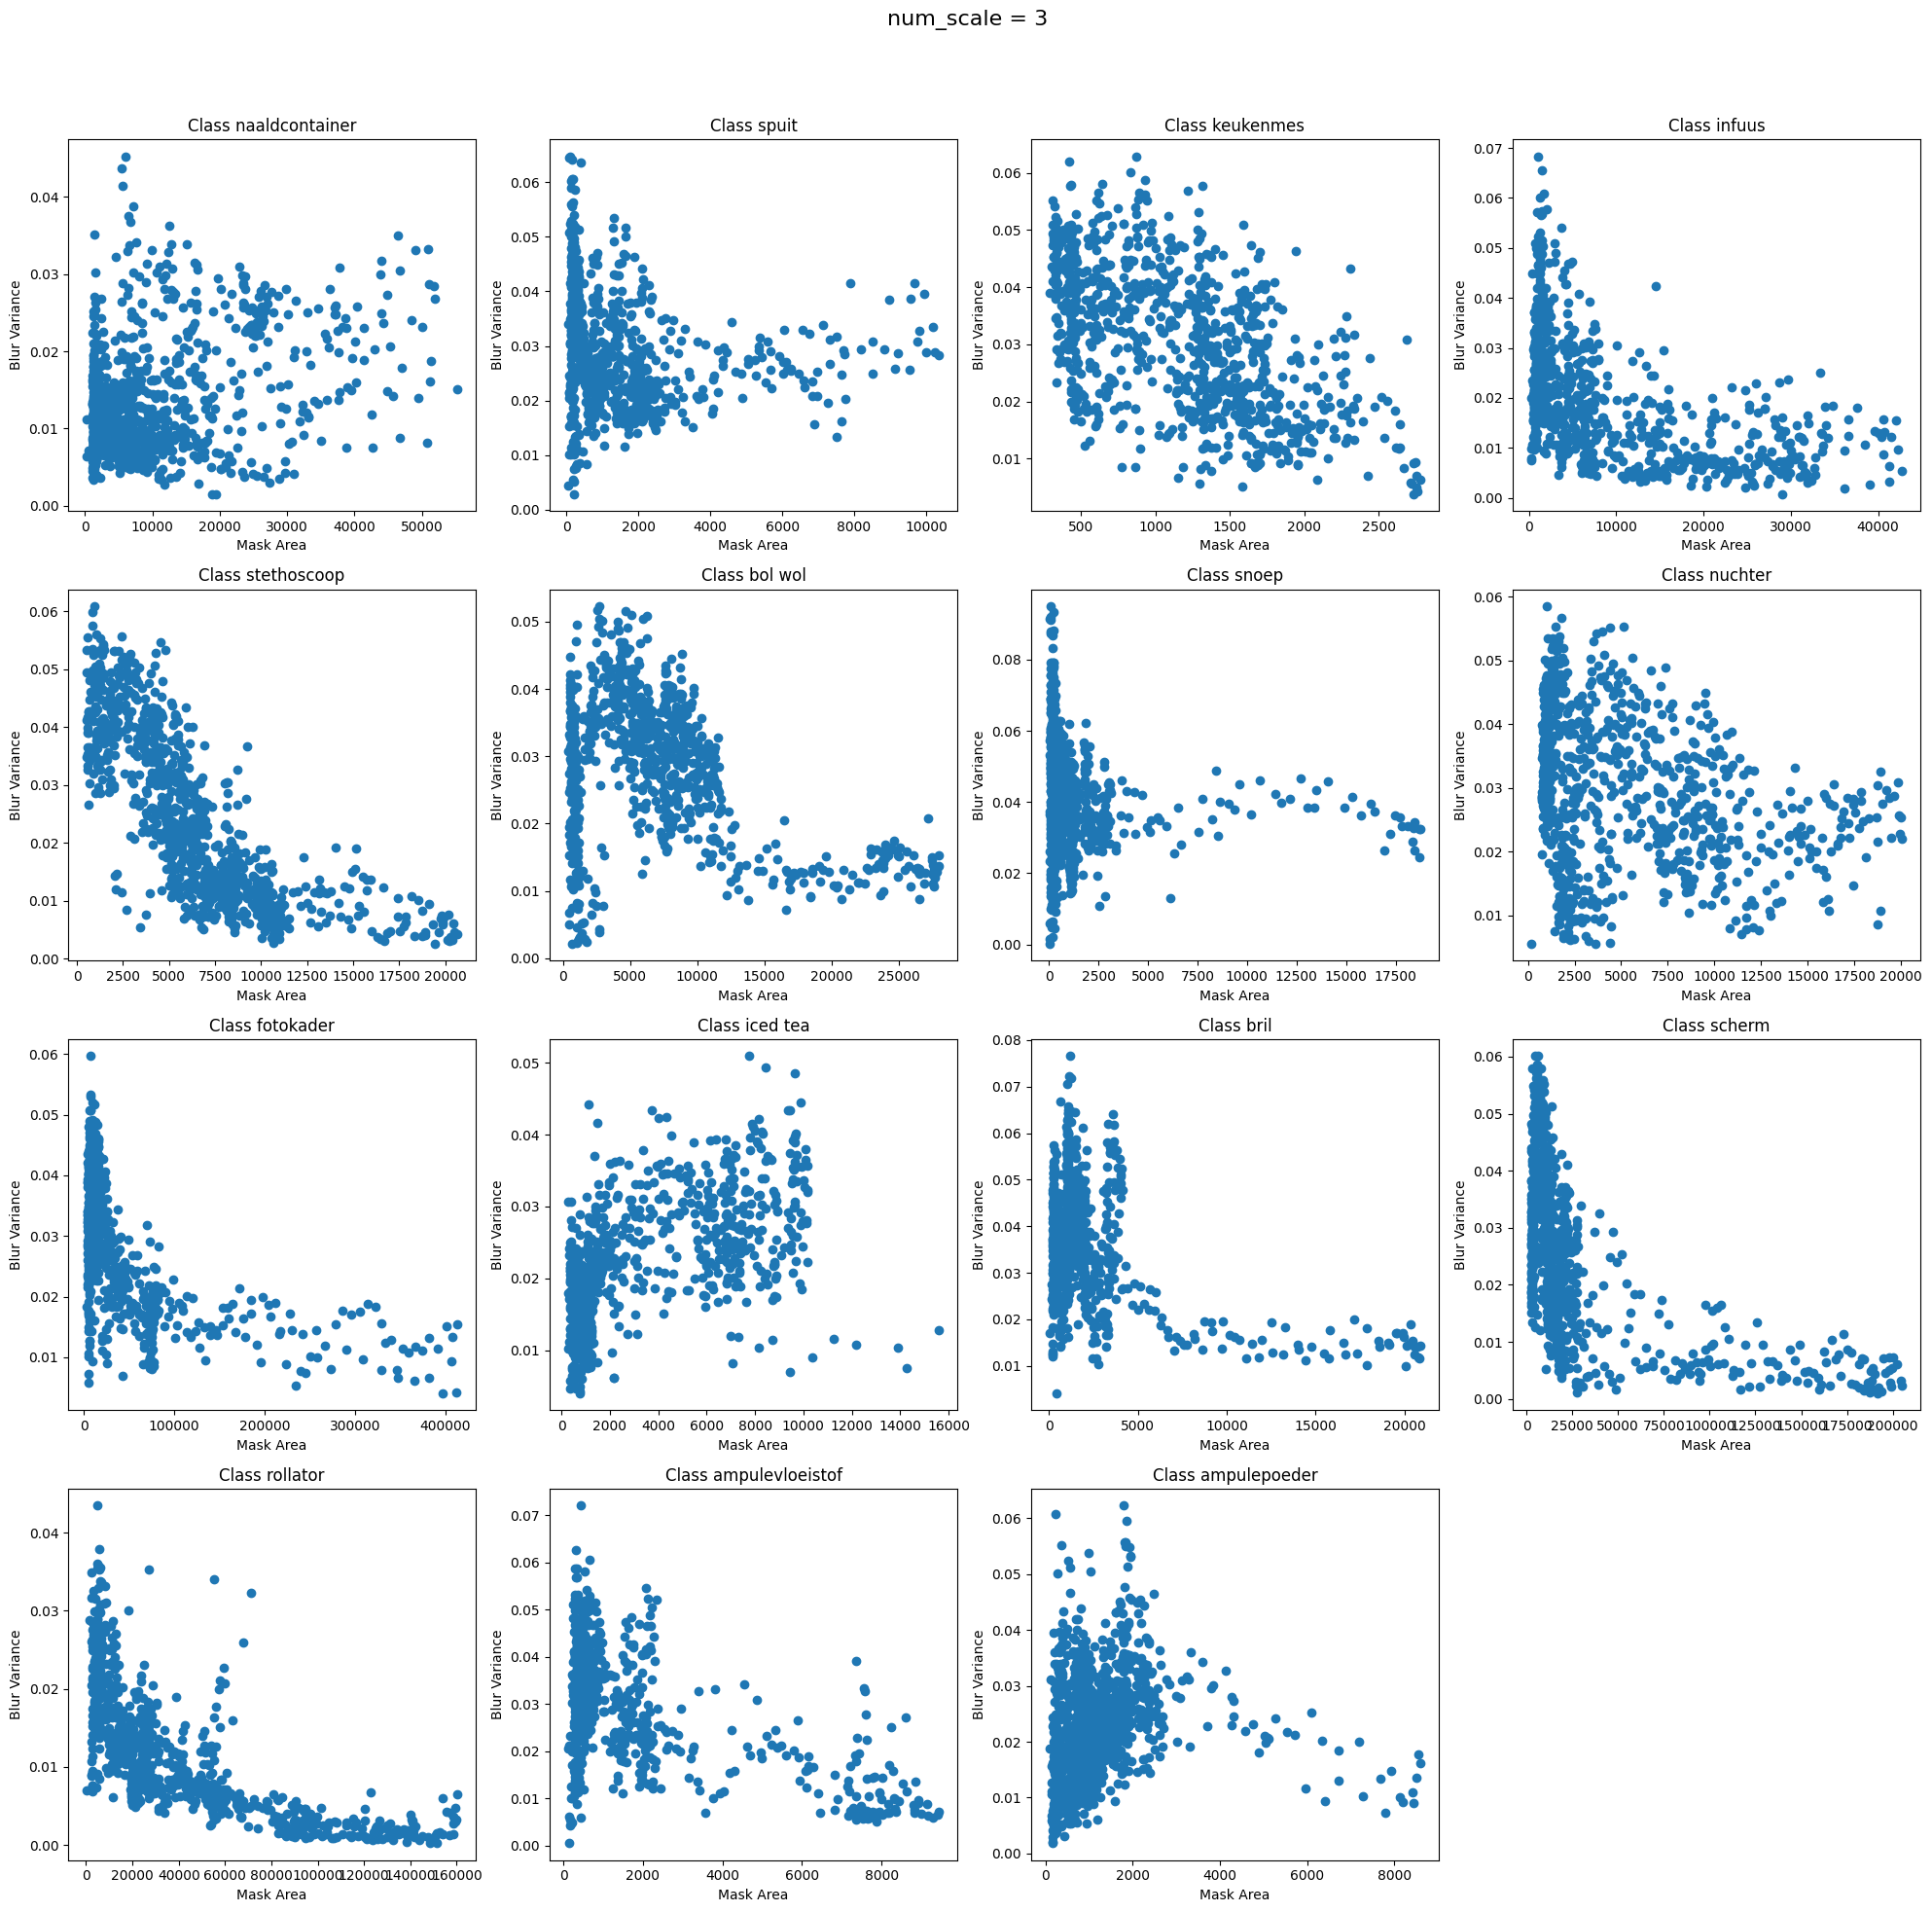

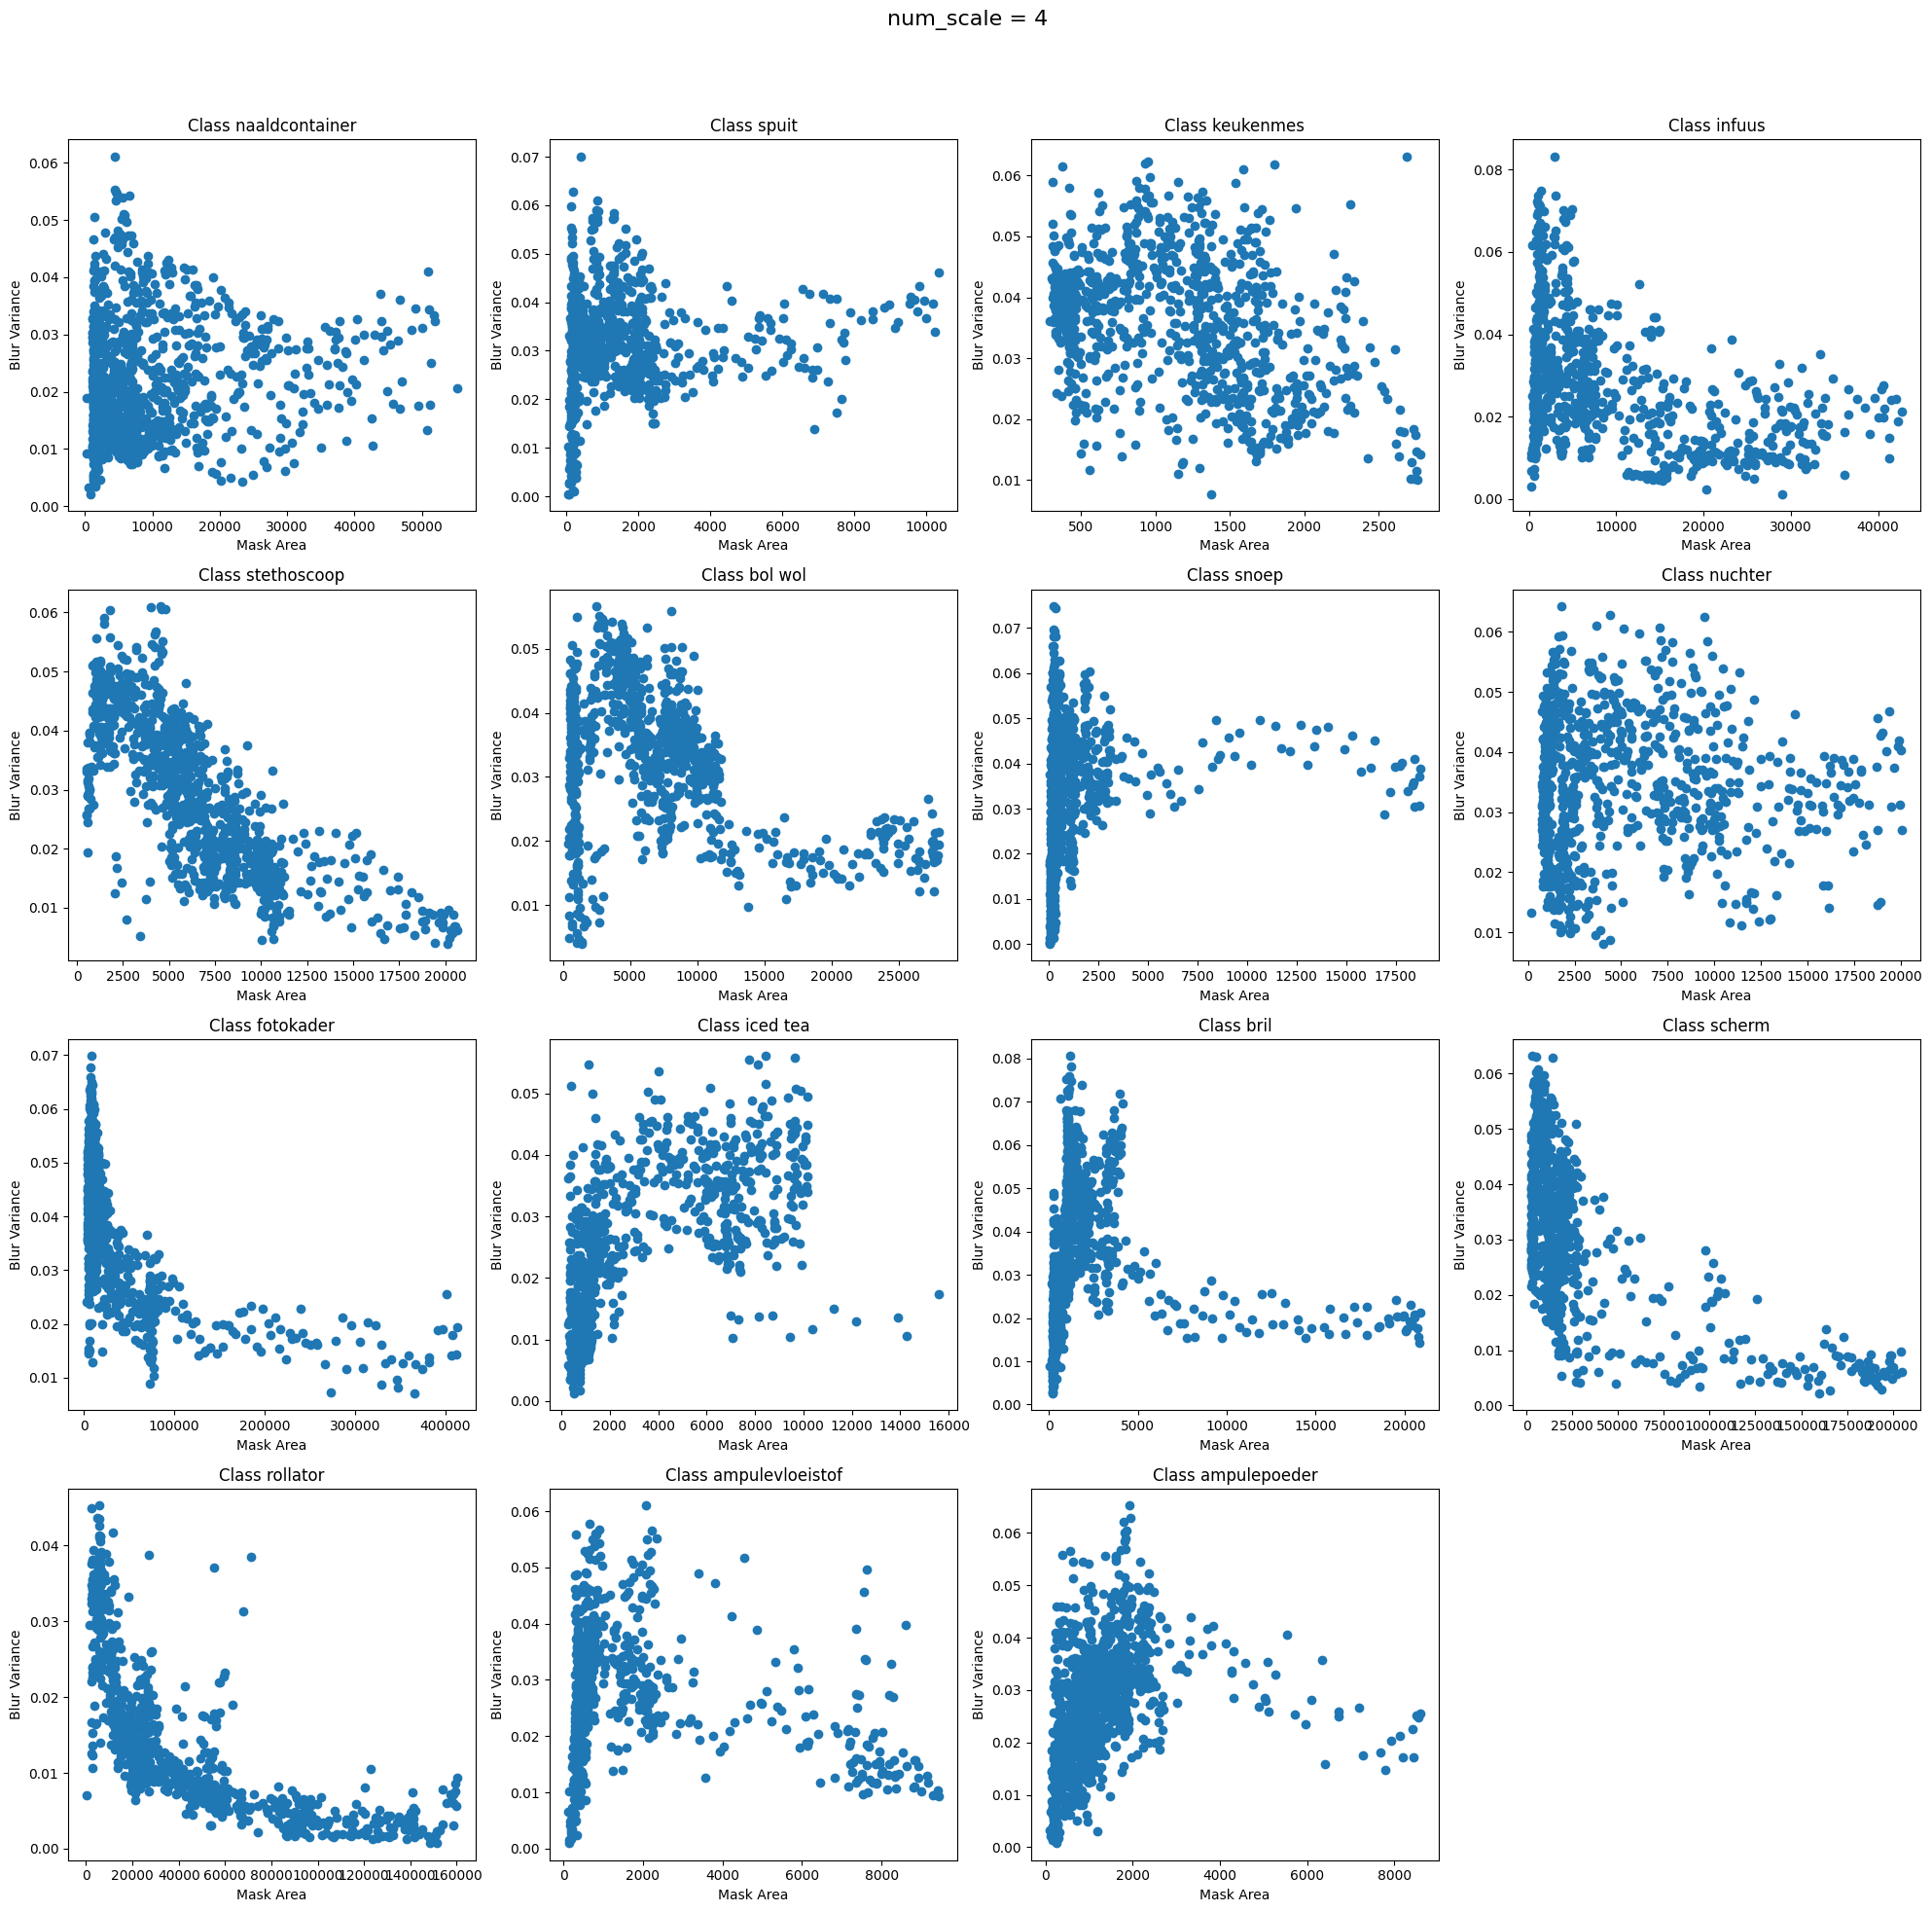

In [15]:
# Get the unique num_scale values.
unique_scales = sorted(blur_df["num_scale"].unique())


# Loop over each num_scale value.
for scale in unique_scales:
    # Filter the DataFrame for the current num_scale.
    scale_data = blur_df[blur_df["num_scale"] == scale]

    # Get the sorted unique class IDs within this scale.
    unique_classes = sorted(scale_data["class_id"].unique())
    n_classes = len(unique_classes)

    # Calculate grid dimensions to be as square as possible.
    cols = math.ceil(np.sqrt(n_classes))
    rows = math.ceil(n_classes / cols)

    # Create subplots for this scale.
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axs = np.array(axs).flatten()  # Flatten in case of 2D axes array.

    # Loop over each class to create the scatter plot.
    for i, class_id in enumerate(unique_classes):
        ax = axs[i]
        # Filter the data for the current class.
        class_subset = scale_data[scale_data["class_id"] == class_id]
        ax.scatter(class_subset["mask_area"], class_subset["blur_var"])

        ax.set_title(f"Class {CLASS_ID_TO_NAME[class_id]}")
        ax.set_xlabel("Mask Area")
        ax.set_ylabel("Blur Variance")

    # Delete any unused axes if the grid is larger than the number of classes.
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Set a super title for the grid indicating the num_scale.
    fig.suptitle(f"num_scale = {scale}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

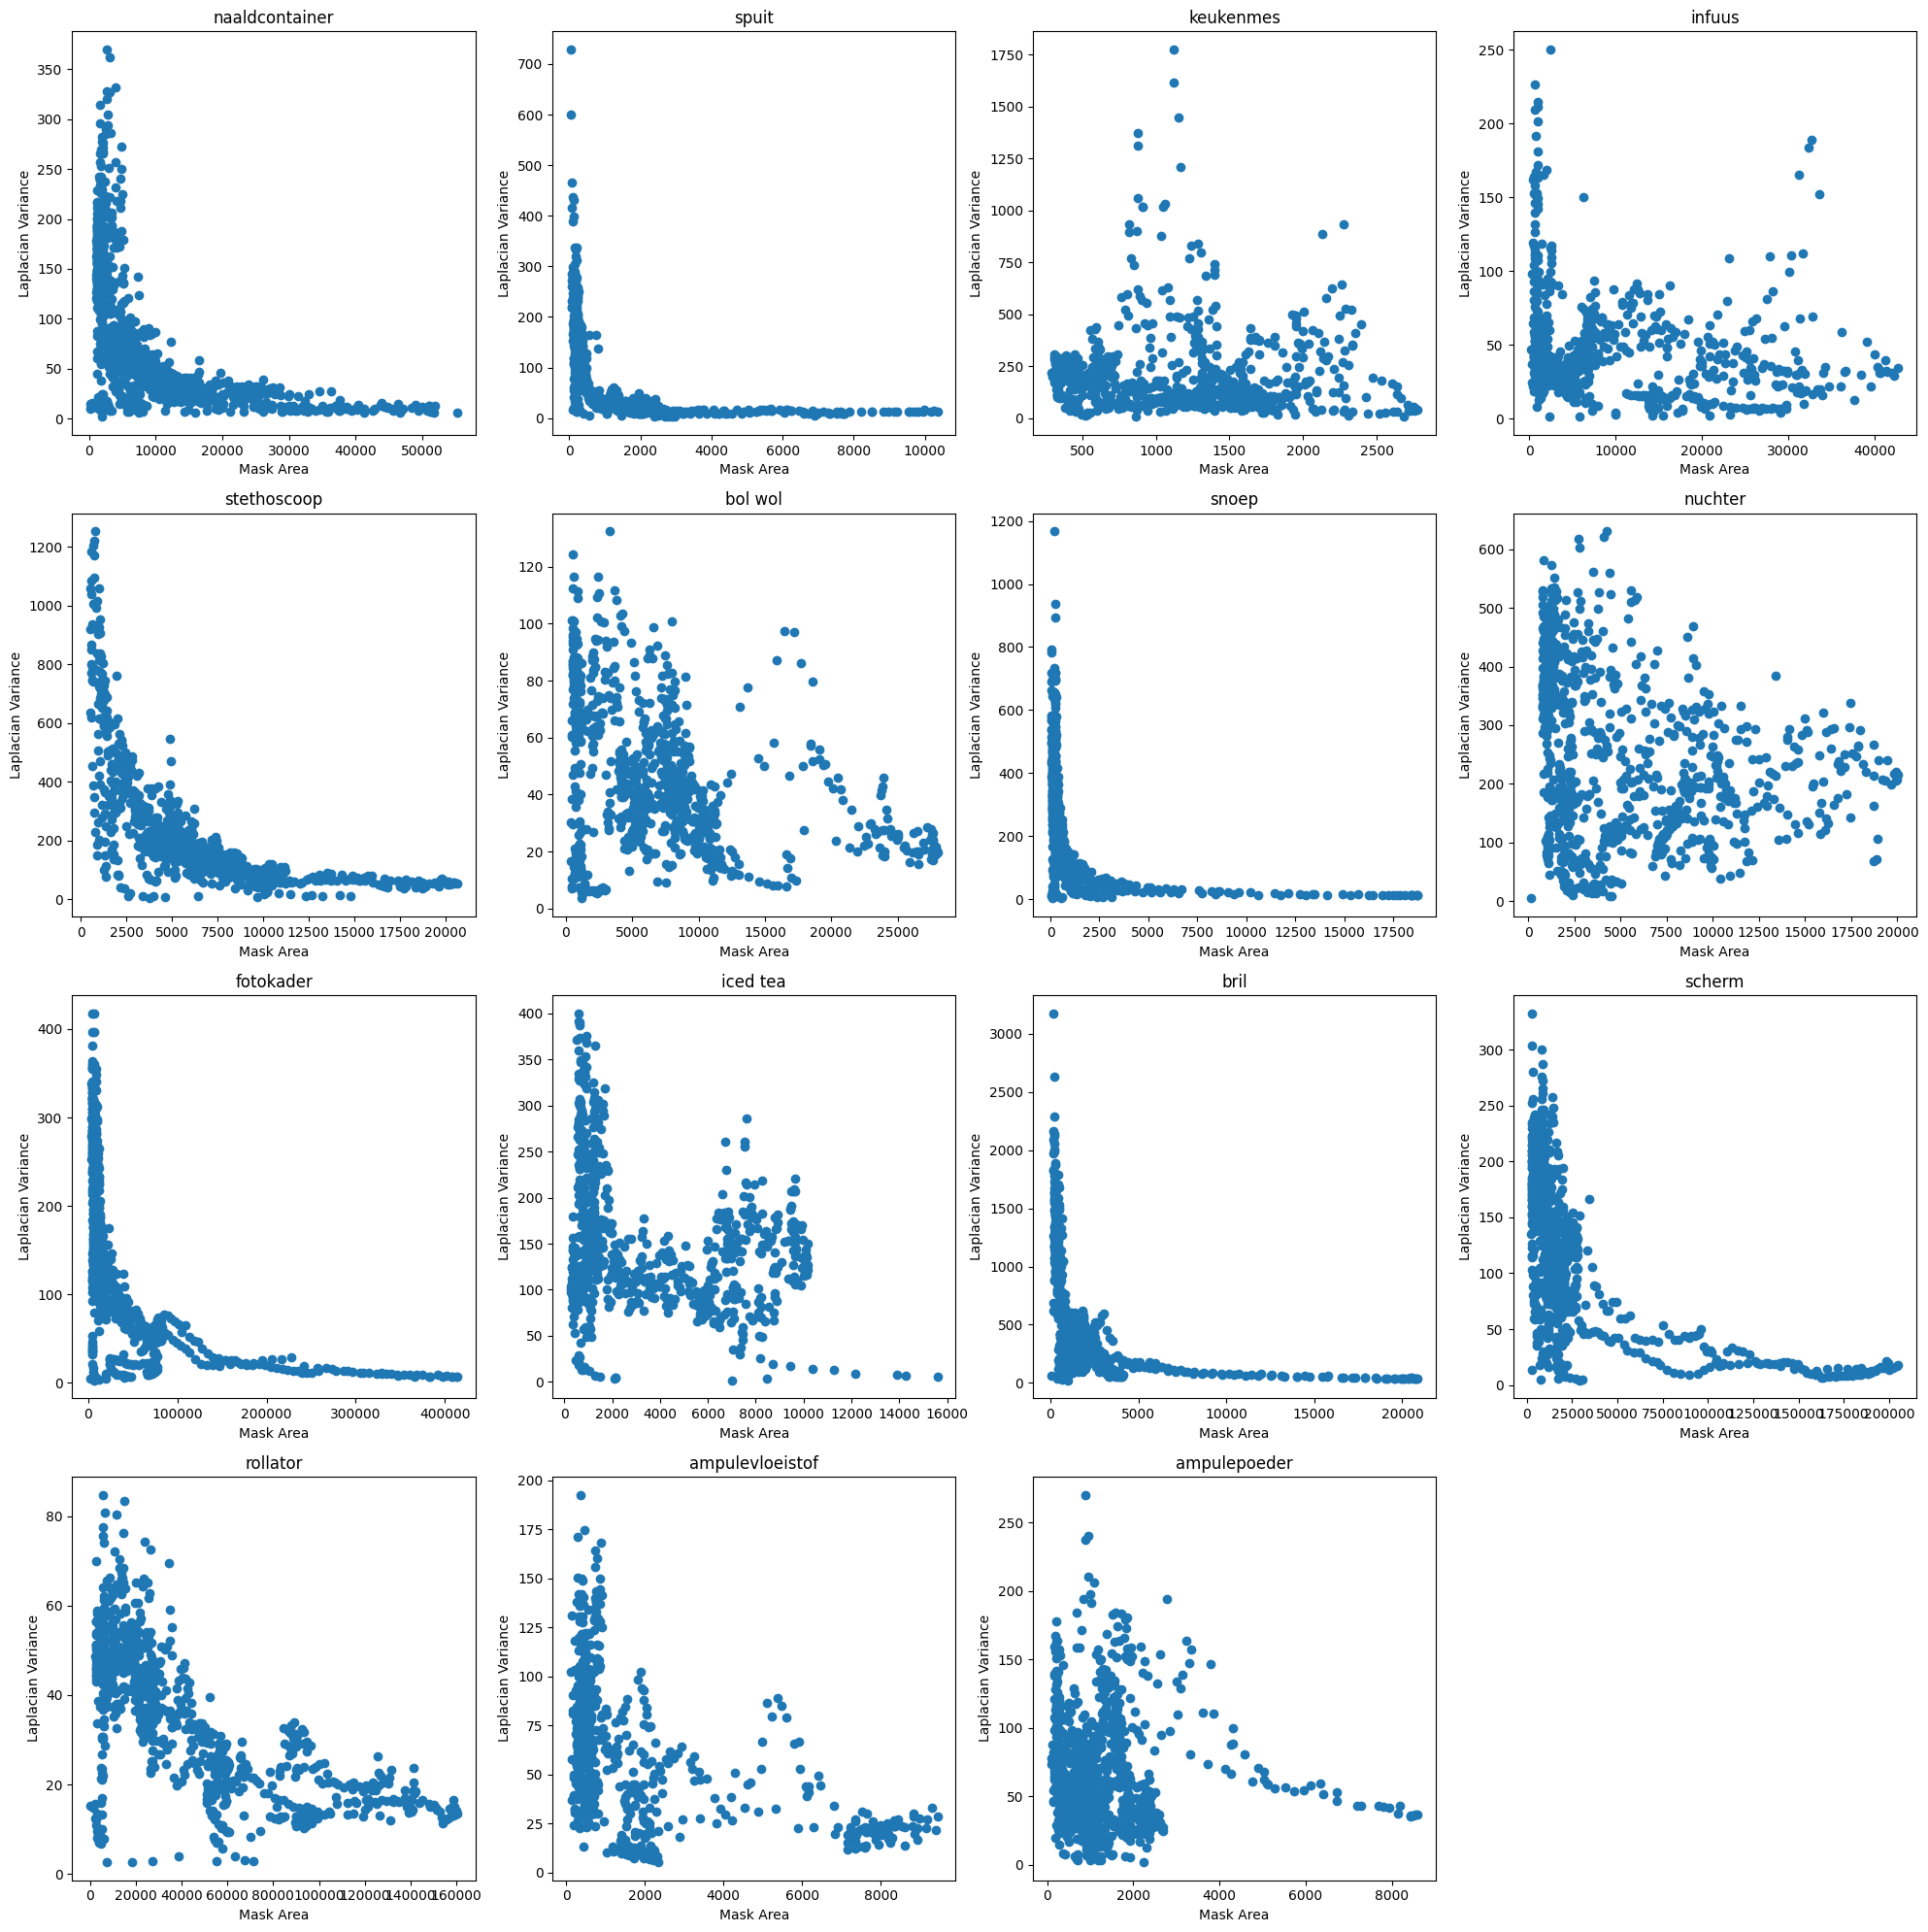

In [3]:
# Remove the num_scale column as it's not needed for the final analysis.
laplacian_result_df = blur_df.drop(columns=["num_scale"])
laplacian_result_df = laplacian_result_df.drop_duplicates()

# Get the sorted list of unique class IDs
unique_classes = sorted(laplacian_result_df["class_id"].unique())
n_classes = len(unique_classes)

# Calculate grid dimensions to be as square as possible.
cols = math.ceil(np.sqrt(n_classes))
rows = math.ceil(n_classes / cols)

# Create subplots with calculated grid size.
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Flatten the axes array for easier iteration; handles the case when there is only one row or one column.
axs = np.array(axs).flatten()

# Loop over each class to create a plot.
for i, class_id in enumerate(unique_classes):
    ax = axs[i]
    # Filter the dataframe for the current class_id.
    subset = laplacian_result_df[laplacian_result_df["class_id"] == class_id]

    # Create a scatter plot: mask_area on the x-axis and laplacian_variance on the y-axis.
    ax.scatter(subset["mask_area"], subset["laplacian_variance"])

    # Label the plot.
    ax.set_title(f"{CLASS_ID_TO_NAME[class_id]}")
    ax.set_xlabel("Mask Area")
    ax.set_ylabel("Laplacian Variance")

# Remove any empty subplots if the grid is larger than the number of classes.
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()